In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [127]:
print(pd.__version__)

0.19.1


In [81]:
df_CF_task2_all = pd.read_csv("Turkish_Gezi_protest/CF_full_report_20_05_2018.csv",encoding='ISO-8859-1')
df_CF_task1_all = pd.read_csv("Turkish_Gezi_protest/CF_task1_all_answers_best_answer_21_05_2018.csv",encoding='ISO-8859-1')

In [82]:
print('cf task1 all gudgments',len(df_CF_task1_all))
print('cf task2 all gudgments',len(df_CF_task2_all))

cf task1 all gudgments 4675
cf task2 all gudgments 5915


In [83]:
len(df_CF_task1_all.columns)

23

In [84]:
len(df_CF_task2_all.columns)

22

In [85]:
df_CF_task1_all.columns

Index(['_unit_id', '_created_at', '_golden', '_id', '_missed', '_started_at',
       '_tainted', '_channel', '_trust', '_worker_id', '_country', '_region',
       '_city', '_ip',
       'does_this_tweet_reportdiscuss_violent_incidents_happened_during_the_protest',
       'is_this_tweet_related_to_turkish_protests_2013', 'orig__golden',
       'created_at',
       'does_this_tweet_reportdiscuss_violent_incidents_happened_during_the_protest_gold',
       'id', 'is_this_tweet_related_to_turkish_protests_2013_gold', 'label',
       'text'],
      dtype='object')

In [86]:
df_CF_task2_all.columns

Index(['_unit_id', '_created_at', '_golden', '_id', '_missed', '_started_at',
       '_tainted', '_channel', '_trust', '_worker_id', '_country', '_region',
       '_city', '_ip',
       'does_this_tweet_reportdiscuss_violent_incidents_happened_during_the_protest',
       'is_this_tweet_related_to_turkish_protests_2013', 'created_at',
       'does_this_tweet_reportdiscuss_violent_incidents_happened_during_the_protest_gold',
       'id', 'is_this_tweet_related_to_turkish_protests_2013_gold',
       'proccd_text', 'text'],
      dtype='object')

In [87]:
df_CF_task2_all.rename(columns={'does_this_tweet_reportdiscuss_violent_incidents_happened_during_the_protest':'violence',
                         'is_this_tweet_related_to_turkish_protests_2013' : 'protest'}, inplace =True)

In [88]:
df_CF_task1_all.rename(columns={'does_this_tweet_reportdiscuss_violent_incidents_happened_during_the_protest':'violence',
                         'is_this_tweet_related_to_turkish_protests_2013' : 'protest'}, inplace =True)

In [89]:
df_CF_task2_all.columns

Index(['_unit_id', '_created_at', '_golden', '_id', '_missed', '_started_at',
       '_tainted', '_channel', '_trust', '_worker_id', '_country', '_region',
       '_city', '_ip', 'violence', 'protest', 'created_at',
       'does_this_tweet_reportdiscuss_violent_incidents_happened_during_the_protest_gold',
       'id', 'is_this_tweet_related_to_turkish_protests_2013_gold',
       'proccd_text', 'text'],
      dtype='object')

In [90]:
df_CF_task1_all = df_CF_task1_all[['_unit_id', '_created_at', '_golden', '_id', '_missed', '_channel', '_trust',
                                  '_worker_id', 'protest','is_this_tweet_related_to_turkish_protests_2013_gold',
                                   'violence','does_this_tweet_reportdiscuss_violent_incidents_happened_during_the_protest_gold',
                                   'text']]

In [91]:
df_CF_task2_all = df_CF_task2_all[['_unit_id', '_created_at', '_golden', '_id', '_missed', '_channel', '_trust',
                                  '_worker_id', 'protest','is_this_tweet_related_to_turkish_protests_2013_gold',
                                   'violence','does_this_tweet_reportdiscuss_violent_incidents_happened_during_the_protest_gold',
                                   'text']]

In [93]:
df_CF_combined_tasks = pd.concat([df_CF_task1_all, df_CF_task2_all])

In [94]:
len(df_CF_combined_tasks)

10590

In [95]:
df_CF_combined_tasks.count()

_unit_id                                                                            10590
_created_at                                                                         10590
_golden                                                                             10590
_id                                                                                 10590
_missed                                                                               218
_channel                                                                            10590
_trust                                                                              10590
_worker_id                                                                          10590
protest                                                                             10590
is_this_tweet_related_to_turkish_protests_2013_gold                                  1558
violence                                                                             4488
does_this_

In [96]:
df_CF_combined_tasks_misses = df_CF_combined_tasks[df_CF_combined_tasks['_missed']==True]

In [97]:
df_CF_combined_tasks.to_csv('Turkish_Gezi_protest/CF_combined_tasks_missed_test_questions.csv')

In [98]:
df_CF_combined_tasks_test_questions = df_CF_combined_tasks[df_CF_combined_tasks['_golden'] == True]

In [100]:
len(df_CF_combined_tasks_test_questions)

3285

In [105]:
df_CF_combined_tasks_protest = df_CF_combined_tasks[df_CF_combined_tasks['protest'] == 1]

In [106]:
len(df_CF_combined_tasks_protest)

4488

In [108]:
df_CF_combined_tasks_non_protest = df_CF_combined_tasks[df_CF_combined_tasks['protest'] ==0 ]

In [109]:
len(df_CF_combined_tasks_non_protest)

6102

In [111]:
df_CF_combined_tasks_violence = df_CF_combined_tasks[df_CF_combined_tasks['violence'] == 1]

In [112]:
len(df_CF_combined_tasks_violence)

1201

In [113]:
df_CF_combined_tasks_non_violence = df_CF_combined_tasks[df_CF_combined_tasks['violence'] == 0]

In [114]:
len(df_CF_combined_tasks_non_violence)

3207

In [121]:
df_CF_combined_tasks_test_questions_grp_by_text = df_CF_combined_tasks_test_questions.groupby('text')

In [122]:
len(df_CF_combined_tasks_test_questions_grp_by_text)

174

In [123]:
df_CF_combined_tasks_test_questions_grp_by_text = df_CF_combined_tasks_test_questions_grp_by_text['text','_worker_id', '_trust']

In [125]:
type(df_CF_combined_tasks_test_questions_grp_by_text)

pandas.core.groupby.DataFrameGroupBy

In [126]:
text, avg_user_trust, min_user_trust, max_user_trust = [],[],[],[]

for title, group in df_CF_combined_tasks_test_questions_grp_by_text:
    avg_trust = group['_trust'].aggregate(np.mean)
    min_trust = group['_trust'].aggregate(np.min)
    max_trust = group['_trust'].aggregate(np.max)
    text.append(title)
    avg_user_trust.append(avg_trust)
    min_user_trust.append(min_trust)
    max_user_trust.append(max_trust)

AttributeError: 'Series' object has no attribute 'aggregate'

In [55]:
df_CF_grouped_txt_test_question_user_trust =  pd.DataFrame({'text':text, 'avg_user_trust':avg_user_trust,
                                                    'min_user_trust':min_user_trust,
                                                    "max_user_trust":max_user_trust})

In [56]:
df_CF_grouped_txt_test_question_user_trust.head()

,avg_user_trust,max_user_trust,min_user_trust,text


In [57]:
df_CF_all_grp_by_text= df_CF_all.groupby('text')
len(df_CF_all_grp_by_text)

1423

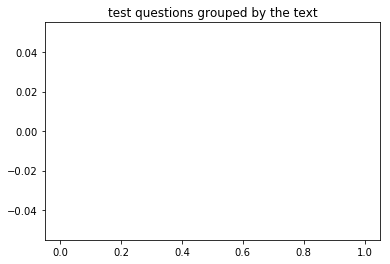

In [58]:
plt.hist(df_CF_grouped_txt_test_question_user_trust.avg_user_trust)
plt.title('test questions grouped by the text')

In [79]:
text, avg_user_trust, min_user_trust, max_user_trust = [],[],[],[]

for title, group in df_CF_all_grp_by_text:
    avg_trust = group['_trust'].aggregate(np.mean)
    min_trust = group['_trust'].aggregate(np.min)
    max_trust = group['_trust'].aggregate(np.max)
    text.append(title)
    avg_user_trust.append(avg_trust)
    min_user_trust.append(min_trust)
    max_user_trust.append(max_trust)

In [82]:
df_CF_grouped_text_user_trust =  pd.DataFrame({'text':text, 'avg_user_trust':avg_user_trust,
                                                    'min_user_trust':min_user_trust,
                                                    "max_user_trust":max_user_trust})

In [83]:
df_CF_grouped_text_user_trust.head()

,avg_user_trust,max_user_trust,min_user_trust,text
0,0.993825,1.0,0.9833,! RT @ImTooKind_: Turkey meat is better than h...
1,0.984000,1.0,0.9600,"""@19fidel40: Silence is a crime against police..."
2,0.997333,1.0,0.9920,"""@History_Pics: A man with a sheep on his back..."
3,1.000000,1.0,1.0000,"""@Rosa__Luxemburg: Fight, resist, stand."" #dir..."
4,0.982900,1.0,0.9487,"""@WSJ: Survey: More than half of the protester..."


Text(0.5,1,'test question answers grouped by the text')

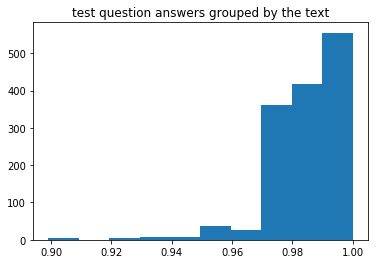

In [102]:
plt.hist(df_CF_grouped_text_user_trust.avg_user_trust)
plt.title('finalized grouped by the text')

In [86]:
df_CF_all_grp_by_channel= df_CF_all.groupby('_channel')
len(df_CF_all_grp_by_channel)

7

In [100]:
text, channel = [],[]
for title, group in df_CF_all_grp_by_channel:
    print('channel', group['_channel'])

channel 0       clixsense
1       clixsense
2       clixsense
3       clixsense
4       clixsense
5       clixsense
6       clixsense
8       clixsense
9       clixsense
10      clixsense
11      clixsense
12      clixsense
13      clixsense
14      clixsense
15      clixsense
16      clixsense
17      clixsense
18      clixsense
19      clixsense
20      clixsense
22      clixsense
23      clixsense
24      clixsense
25      clixsense
26      clixsense
27      clixsense
28      clixsense
29      clixsense
31      clixsense
32      clixsense
          ...    
5885    clixsense
5886    clixsense
5887    clixsense
5888    clixsense
5889    clixsense
5890    clixsense
5891    clixsense
5892    clixsense
5893    clixsense
5894    clixsense
5895    clixsense
5896    clixsense
5897    clixsense
5898    clixsense
5899    clixsense
5900    clixsense
5901    clixsense
5902    clixsense
5903    clixsense
5904    clixsense
5905    clixsense
5906    clixsense
5907    clixsense
5908    clixsense
59

In [23]:
df_CF_all_grp_by_workers= df_CF_all.groupby('_worker_id')
len(df_CF_all_grp_by_workers)

119

In [60]:
len(df_CF_all_test_questions.groupby('_worker_id'))

119